<a href="https://colab.research.google.com/github/ole-ksandra/IAD/blob/main/%D0%9F%D0%A02_%D0%A4%D0%91_%D0%B751%D0%BC%D0%BF_Oleksandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
img_url = "https://drive.google.com/file/d/1WwuJa-veSd3-bt4sC9_MwV39JsIFeB9G/view?usp=sharing"
img_path = "dsc_1946-1-785x538.jpg"

Розміри зображення: (538, 785, 3)
Тип даних: uint8


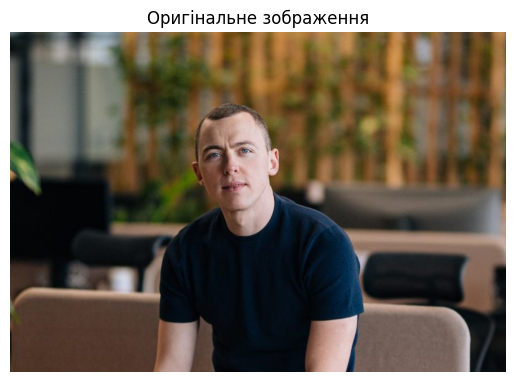

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Завантажуємо
img = plt.imread("dsc_1946-1-785x538.jpg")

# Виводимо інформацію про зображення
H, W, C = img.shape
print("Розміри зображення:", img.shape)
print("Тип даних:", img.dtype)

# Показуємо оригінальне зображення
plt.imshow(img)
plt.title('Оригінальне зображення')
plt.axis('off') # Вимикаємо осі для кращого вигляду
plt.show()

Зображення можна уявити як набір точок у 3D-просторі. Кожен піксель = вектор (R, G, B). Алгоритм k-means шукає k «репрезентативних» кольорів (центроїдів), а потім замінює кожен піксель найближчим центроїдом.

In [ ]:
# Нормалізуємо дані до діапазону [0, 1]
data = img / 255.0

# Перетворюємо зображення у 2D масив (кількість_пікселів x 3)
pixels = data.reshape(-1, 3)
print("Розміри масиву пікселів:", pixels.shape)

Розміри масиву пікселів: (422330, 3)


Запускаю k-means для k = 64...
Запускаю k-means для k = 32...
Запускаю k-means для k = 16...
Запускаю k-means для k = 8...


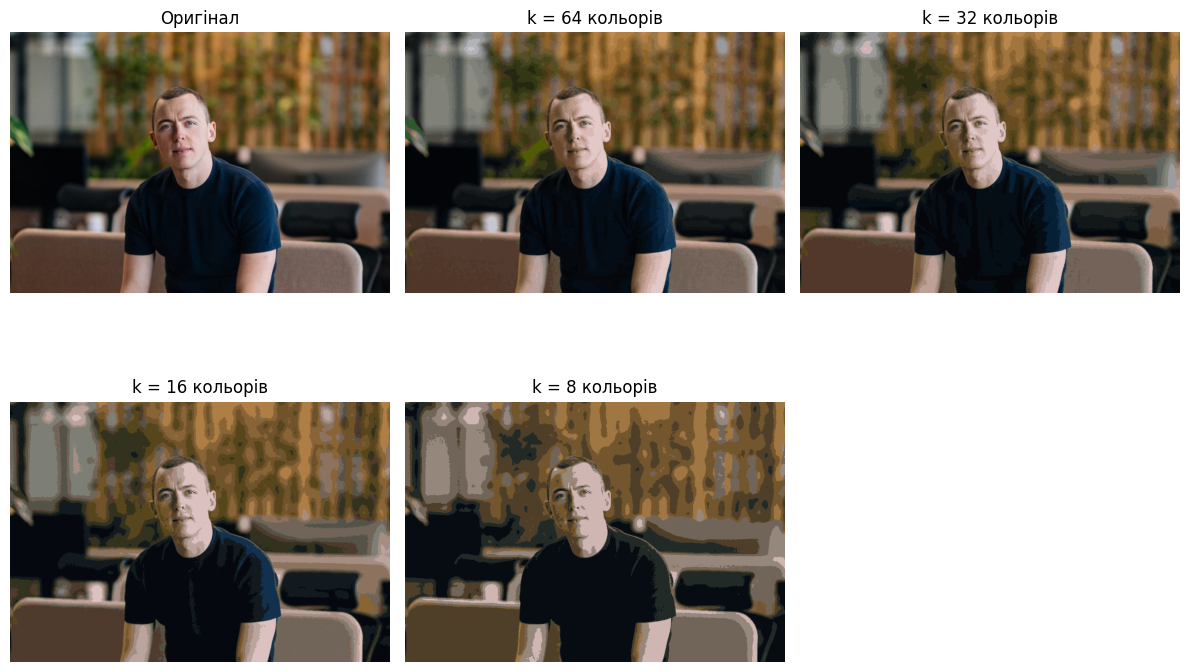

In [ ]:
# Функція квантування зображення до k кольорів за допомогою KMeans
def quantize_kmeans(img, k, random_state=42):
    # Нормалізуємо, якщо потрібно
    if img.dtype == np.uint8:
        data = img / 255.0
    else:
        data = img.astype(float)

    H, W, C = img.shape
    pixels = data.reshape(-1, 3)

    # Навчаємо K-Means
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    kmeans.fit(pixels)

    # Центроїди — нові кольори
    new_colors = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Збираємо квантоване зображення
    quantized_pixels = new_colors[labels]
    quantized_img = quantized_pixels.reshape(H, W, C)

    return quantized_img

# Рівні квантування згідно з завданням
levels = [64, 32, 16, 8]

plt.figure(figsize=(12, 8))

# Оригінал
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Оригінал')
plt.axis('off')

# Квантування для кожного K
for i, k in enumerate(levels, start=2):
    print(f"Запускаю k-means для k = {k}...")
    q_img = quantize_kmeans(img, k)
    plt.subplot(2, 3, i)
    plt.imshow(q_img)
    plt.title(f'k = {k} кольорів')
    plt.axis('off')

plt.tight_layout()
plt.show()
